### https://www.kaggle.com/hrithikjain49/naukri-com-analysis-of-india

####  naukri.com is a recruitment platform that provides hiring-related services to corporates/recruiters, placement agencies and to job seekers in India.

#### The data set captures the 14 attributes of the job postings that are done between 2015 - 2017
    This is naukri.com job portal dataset and it was created by teams at PromptCloud and DataStock. The dataset gives you information about job opportunities published by recruiters and has some importand features or columns such as Industry, Location, Payrate, Experience required in Years etc which can be analysed.

In [18]:
import numpy as np #for algebric calculations
import pandas as pd #essential for data reading,writing etc
import seaborn as sns #visualization library
import matplotlib.pyplot as plt #visualization library.

import warnings
warnings.filterwarnings('ignore')

In [19]:
### for entire setup of plotly , u have to install chart_studio along with plotly module..

#import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [20]:
import sys
print('Python : {}'.format(sys.version[0:5]))
print('Numpy : {}'.format(np.__version__))
print('Pandas : {}'.format(pd.__version__))
print('Seaborn : {}'.format(sns.__version__))


Python : 3.8.8
Numpy : 1.20.1
Pandas : 1.2.4
Seaborn : 0.11.1


In [21]:

# Define the path of CSV file & import the dataset.

df=pd.read_csv(r'F:\Data Analysis_projects\Naukri.com\Updated_data/naukri_data.csv') 

In [22]:
df.head(2)

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,site_name,skills,min_pay,max_pay,min_exp,max_exp,avg_payrate,avg_experience,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,NaN,ITES,150000.0,225000.0,0.0,1.0,187500.0,0.5,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,NaN,Marketing,150000.0,250000.0,0.0,0.0,200000.0,0.0,21.0,5.0,2016.0


In [23]:
# Display the number of rows and columns in the dataset.

nrow,ncol=df.shape
print(f'There are {nrow} rows and {ncol} colunms in the dataset')

There are 22000 rows and 19 colunms in the dataset


### Showcase your missing values 

In [24]:
count_missing = df.isnull().sum()
count_missing

company                    4
education               1996
industry                   5
jobdescription             4
jobid                      0
joblocation_address      501
jobtitle                   0
numberofpositions      17536
site_name              18013
skills                   528
min_pay                17359
max_pay                17060
min_exp                  116
max_exp                  116
avg_payrate            17360
avg_experience           116
day                       23
month                     23
year                      23
dtype: int64

In [25]:
# a general overview of data
# T means Transpose

df.describe().T

,count,mean,std,min,25%,50%,75%,max
jobid,22000.0,1.561171e+11,9.423956e+10,1.011600e+10,6.121650e+10,1.602169e+11,2.502166e+11,3.112155e+11
numberofpositions,4464.0,4.511694e+01,1.861972e+02,1.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,2.000000e+03
min_pay,4641.0,4.493986e+05,5.509237e+05,1.500000e+01,1.500000e+05,2.500000e+05,5.000000e+05,5.500000e+06
max_pay,4940.0,7.342964e+05,7.559780e+05,1.000000e+00,3.000000e+05,5.000000e+05,9.000000e+05,8.000000e+06
min_exp,21884.0,3.600987e+00,3.100532e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,2.600000e+01
max_exp,21884.0,7.117803e+00,3.923900e+00,0.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00,3.000000e+01
avg_payrate,4640.0,6.149812e+05,6.442135e+05,1.750000e+01,2.500000e+05,3.750000e+05,7.500000e+05,6.500000e+06
avg_experience,21884.0,5.359395e+00,3.444409e+00,0.000000e+00,3.000000e+00,4.500000e+00,7.000000e+00,2.800000e+01
day,21977.0,1.884993e+01,9.751744e+00,1.000000e+00,9.000000e+00,2.200000e+01,2.900000e+01,3.100000e+01
month,21977.0,7.224189e+00,4.062145e+00,1.000000e+00,3.000000e+00,8.000000e+00,1.100000e+01,1.200000e+01


In [26]:
#Dataset Summary statistics - categorical variables


df.describe(include = ['object']).T

,count,unique,top,freq
company,21996,8469,Indian Institute of Technology Bombay,403
education,20004,2355,"UG: Any Graduate - Any Specialization, Graduat...",2015
industry,21995,63,IT-Software / Software Services,9216
jobdescription,21996,21063,Job Description Send me Jobs like this Adver...,121
joblocation_address,21499,2141,Bangalore,5228
jobtitle,22000,17564,Business Development Executive,93
site_name,3987,1,www.naukri.com,3987
skills,21472,45,IT Software - Application Programming,5989


### Lets perform Bivariate Analysis

### Analysis is of 3 types:
    1..univariate (One feature is involve)
    2..Bi-variate (2 feautres are involve)
    3..Multi-variate analysis (more than 2 features are involve)

### 1..univariate (One feature is involve)
    What is type of available data
    distribution of data looks correct or not
    Is there any anomilies in data or not?
    
    
    ->> univariate Analysis for continuous features..
    we can think of Boxplot ,histogram, distrbution plot & some tabular method like describe func of pd which gives 
    descriptive statistics.
    
    ->> univariate Analysis for categorical features..
    Frequency distrbutions
    Bar chart
    Pie chart
    Countplot
    
    
    Real World problems:
    1..Distribution of max_pay feature.
    2..Frequency_distribution of commpany feature
    

### 3..Multivariate analysis (where 3 features are involved)

       Real world Problems: Can u find the distribution of minimum pay where skills will from IT & job_location 
       must be Mumbai..

In [27]:
### very first lets find out Categorical variables..
## Ways to find categorical variables in a data...

### 1..using list comprehension
### 2..using list 
### 3..using select_dtypes in-built function of pandas (Assignment questions)
### 4..using dictionary                                (Assignment questions)
### 5..using filter & enumeration..                    (Assignment questions)
### 6..using _get_numeric_data() to get numeric columns and then find out categorical columns
### 7..using filter-in-list                            
### 8..using isin



### 1..find categorical variables using list comprehension

In [28]:

categorical = [col for col in df.columns if df[col].dtype=='object']

## categorical= [col for col in df.columns if df[col].dtype=='O']
print(categorical)



['company', 'education', 'industry', 'jobdescription', 'joblocation_address', 'jobtitle', 'site_name', 'skills']


"\ndf.select_dtypes(include='O').columns\n\n"

### 2..find categorical variables using List

In [ ]:

cat=[]
for col in df.columns:
    if df[col].dtype=='object':
        cat.append(col)



### 3..find categorical variables using select_dtypes in-built function of pandas (Assignment questions)

In [ ]:
df.select_dtypes(include='O').columns

### 4...find categorical variables using dictionary

In [29]:

[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object'] ]

['company',
 'education',
 'industry',
 'jobdescription',
 'joblocation_address',
 'jobtitle',
 'site_name',
 'skills']

### 5...find categorical variables using filter & enumeration

In [ ]:
categorical_values  = (df.dtypes == 'object') ### returns value in the form of True & False..
print([categorical_values.index[index] for index, value in enumerate(categorical_values) if value == True])


'''
cat_features=[]
for idx, value in enumerate(categorical_values):
    if value == True:
        cat_fe=categorical_values.index[idx]
        cat_features.append(cat_fe)

'''

### 6..find categorical variables using _get_numeric_data() to get numeric columns and then find out categorical columns

In [31]:
df._get_numeric_data().columns

Index(['jobid', 'numberofpositions', 'min_pay', 'max_pay', 'min_exp',
       'max_exp', 'avg_payrate', 'avg_experience', 'day', 'month', 'year'],
      dtype='object')

In [32]:
set(df.columns) - set(df._get_numeric_data().columns)
### [feature for feature in df.columns if feature not in df._get_numeric_data().columns]


### set(df.columns) - set(df.describe().columns)
### as describe function will only consider our numerical features..

{'company',
 'education',
 'industry',
 'jobdescription',
 'joblocation_address',
 'jobtitle',
 'site_name',
 'skills'}

### 7..find categorical variables using filter-in-list    

In [33]:
df.dtypes[df.dtypes == 'object'].index

Index(['company', 'education', 'industry', 'jobdescription',
       'joblocation_address', 'jobtitle', 'site_name', 'skills'],
      dtype='object')

### 8..find categorical variables using isin function of pandas

In [34]:
### Do you have a mix of 'object' and 'category'? Then use isin
### df.dtypes[df.dtypes.isin(['object'])].index

In [35]:
set(df.columns) - set(df.describe().columns)

{'company',
 'education',
 'industry',
 'jobdescription',
 'joblocation_address',
 'jobtitle',
 'site_name',
 'skills'}

In [36]:
### lets find all the ways to find out numerical features..

In [37]:
numerical=[col for col in df.columns if df[col].dtype!='object']
numerical


### df.select_dtypes(exclude=["object"])

['jobid',
 'numberofpositions',
 'min_pay',
 'max_pay',
 'min_exp',
 'max_exp',
 'avg_payrate',
 'avg_experience',
 'day',
 'month',
 'year']

In [38]:
'''
df.select_dtypes(include=['int64','int32','int16',float64','float32','float16'])

These are ('int64','int32','int16',float64','float32','float16') data-types in numpy library..
Int32 is a 32 bit signed integer , it means it stores both positive & negative values
int32 has a length of 32 bits (4 bytes). 
int32 has has a range of (2³¹ − 1) to  -2^31


float32 is a 32 bit number ,similarly float64 is a 64 bit number.. 
float64 uses 64 bits.
That means that float64’s take up twice as much memory-and doing operations on them may be a lot slower in some machine architectures.
However, float64’s can represent numbers much more accurately than 32 bit floats.
They also allow much larger numbers to be stored..

'''

"\ndf.select_dtypes(include=['int64','int32','int16',float64','float32','float16'])\n\nThese are ('int64','int32','int16',float64','float32','float16') data-types in numpy library..\nInt32 is a 32 bit signed integer , it means it stores both positive & negative values\nint32 has a length of 32 bits (4 bytes). \nint32 has has a range of (2³¹ − 1) to  -2^31\n\n\nfloat32 is a 32 bit number ,similarly float64 is a 64 bit number.. \nfloat64 uses 64 bits.\nThat means that float64’s take up twice as much memory-and doing operations on them may be a lot slower in some machine architectures.\nHowever, float64’s can represent numbers much more accurately than 32 bit floats.\nThey also allow much larger numbers to be stored..\n\n"

In [39]:
[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64','float32','int32','int64']]

['jobid',
 'numberofpositions',
 'min_pay',
 'max_pay',
 'min_exp',
 'max_exp',
 'avg_payrate',
 'avg_experience',
 'day',
 'month',
 'year']

### Correlation For Numerical Features

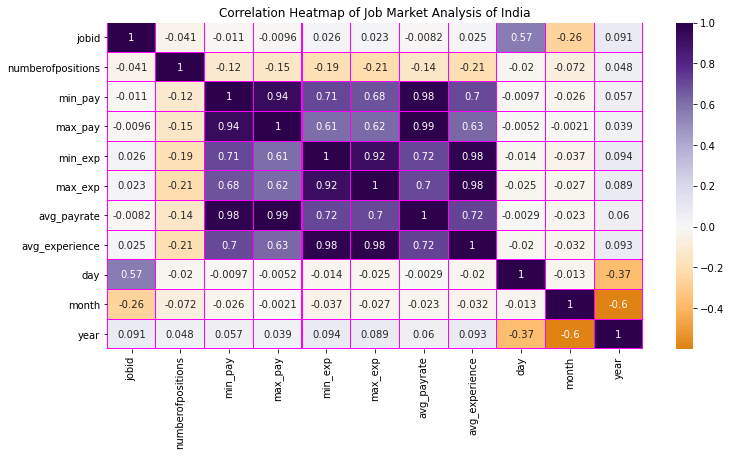

In [40]:
cor_mat = df.corr()
plt.figure(figsize=(12,6))
plt.title('Correlation Heatmap of Job Market Analysis of India')
sns.heatmap(cor_mat, annot=True,cmap="PuOr", center=0, linewidths=0.08,linecolor="magenta")
plt.show()

In [41]:
## Interpretation
## From the above correlation, we can conclude that :-
#### Minimun Pay and Average Payrate variables are highly positively correlated (correlation coefficient = 0.98).
#### Minimum Experience and Minimun Payrate variables are also highly positively correlated (correlation coefficient = 0.71).

In [42]:
## co-relation values with repect to min_pay

corr = df.corr()["min_pay"]
corr

jobid               -0.010856
numberofpositions   -0.121553
min_pay              1.000000
max_pay              0.938850
min_exp              0.709683
max_exp              0.677629
avg_payrate          0.979315
avg_experience       0.704354
day                 -0.009659
month               -0.025859
year                 0.057210
Name: min_pay, dtype: float64

In [43]:
data=df.copy()

### Company Based Analysis

In [44]:
comp=data['company'].str.strip().value_counts().reset_index()

In [45]:
comp.columns=["Company", "Number of Company"]

In [46]:
comp.head()

,Company,Number of Company
0,Indian Institute of Technology Bombay,403
1,Confidential,393
2,National Institute of Industrial Engineering,185
3,Oracle India Pvt. Ltd.,151
4,JPMorgan Chase,135


In [47]:
comp.head(10).style.background_gradient(cmap = "tab20c")

,Company,Number of Company
0,Indian Institute of Technology Bombay,403
1,Confidential,393
2,National Institute of Industrial Engineering,185
3,Oracle India Pvt. Ltd.,151
4,JPMorgan Chase,135
5,Godrej Industries Ltd,125
6,Unitforce technologies Pvt. Ltd.,100
7,Capgemini,98
8,HCL Technologies,95
9,Axis Jobs,92


In [48]:
### Let me plot above data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

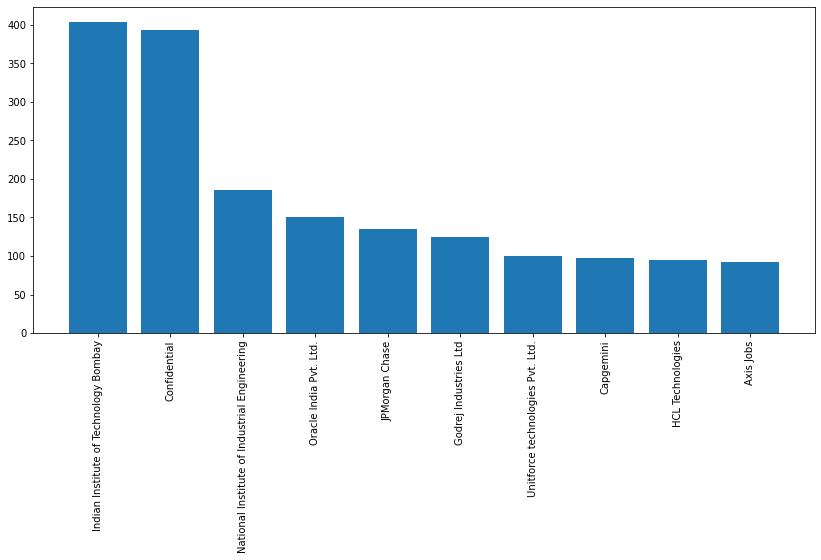

In [49]:
plt.figure(figsize=(14,6))
plt.bar(comp['Company'][0:10], comp['Number of Company'][0:10])
plt.xticks(rotation='vertical')

(array([], dtype=float64), [])

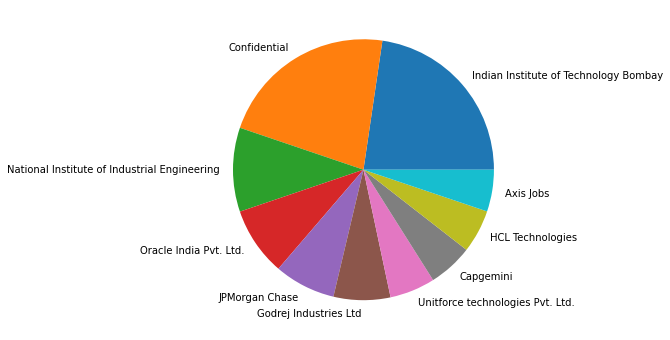

In [50]:
plt.figure(figsize=(14,6))
plt.pie(labels=comp['Company'][0:10], x=comp['Number of Company'][0:10])
plt.xticks(rotation='vertical')

In [51]:
### Lets try to automate above stuffs

In [52]:
def perform_analysis(data ,feature,col1,col2,chart):
    '''This will return us plots depending upon whatever chart we want
    
    Parameters
    -------
    
    data:dataframe 
    
    feature:column_name that we have to consider for analysis
    
    col1:1st column name that u want to assign to dataframe
    
    col2:2nd column name that u want to assign to dataframe
    
    @chart:if value of chart is 1 ,it represents bar chart
    @chart:if value of chart is 2 ,it represents pie chart
    
    '''
    dataframe=data[feature].str.strip().value_counts().reset_index()
    dataframe.columns=[col1, col2]
    print(dataframe.head())
    
    if chart==1:
        
        print('\n This is my bar chart')
        plt.figure(figsize=(14,6))
        plt.bar(dataframe[col1][0:10], dataframe[col2][0:10])
        plt.xticks(rotation='vertical')
        
    elif chart==2:
        
        print('\n This is my pie chart \n')
        plt.figure(figsize=(14,6))
        plt.pie(labels=dataframe[col1][0:10], x=dataframe[col2][0:10])
        plt.xticks(rotation='vertical')
        

In [53]:
print(perform_analysis.__doc__)

This will return us plots depending upon whatever chart we want
    
    Parameters
    -------
    
    data:dataframe 
    
    feature:column_name that we have to consider for analysis
    
    col1:1st column name that u want to assign to dataframe
    
    col2:2nd column name that u want to assign to dataframe
    
    @chart:if value of chart is 1 ,it represents bar chart
    @chart:if value of chart is 2 ,it represents pie chart
    
    


In [54]:
### print(pd.read_csv.__doc__)

                                        Company  Number of Company
0         Indian Institute of Technology Bombay                403
1                                  Confidential                393
2  National Institute of Industrial Engineering                185
3                        Oracle India Pvt. Ltd.                151
4                                JPMorgan Chase                135

 This is my pie chart 



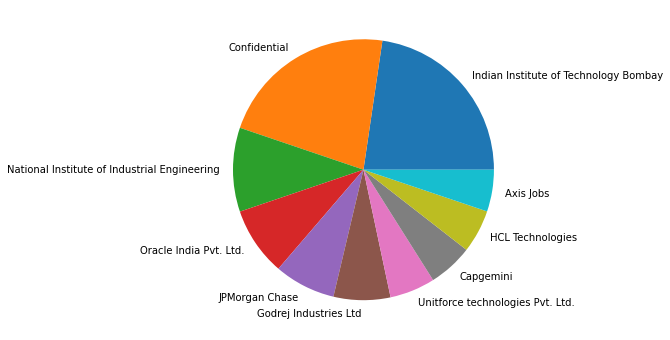

In [55]:
perform_analysis(data,'company',"Company", "Number of Company",2)

### Industries Based Analysis

                               industries  no of industry
0         IT-Software / Software Services            9216
1         Education / Teaching / Training            1322
2                BPO / Call Centre / ITES            1254
3  Banking / Financial Services / Broking            1238
4                  Recruitment / Staffing            1129

 This is my pie chart 



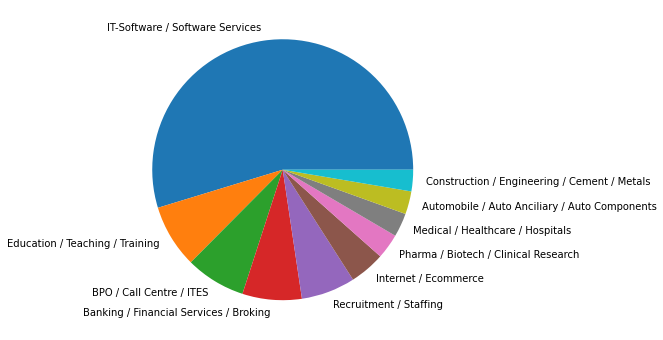

In [56]:
perform_analysis(data,'industry','industries','no of industry',2)

### Jobtitle Analysis

In [57]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_payrate',
       'avg_experience', 'day', 'month', 'year'],
      dtype='object')

                        jobTitles  number of jobs
0  Business Development Executive              93
1    Business Development Manager              92
2               Software Engineer              81
3                 Project Manager              67
4               Android Developer              65

 This is my pie chart 



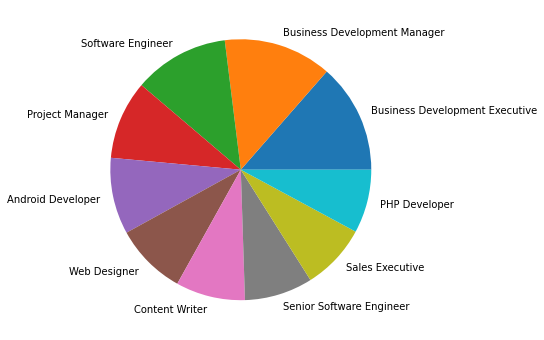

In [58]:
perform_analysis(data,'jobtitle' , 'jobTitles','number of jobs',2)

In [59]:
### Business Development and Software Engineer are the higest occurring jobtitle

### Skills Analysis

                                  Skills  count
0  IT Software - Application Programming   5989
1                                  Sales   2893
2                                   ITES   1640
3                               Teaching   1091
4                                     HR    928

 This is my bar chart


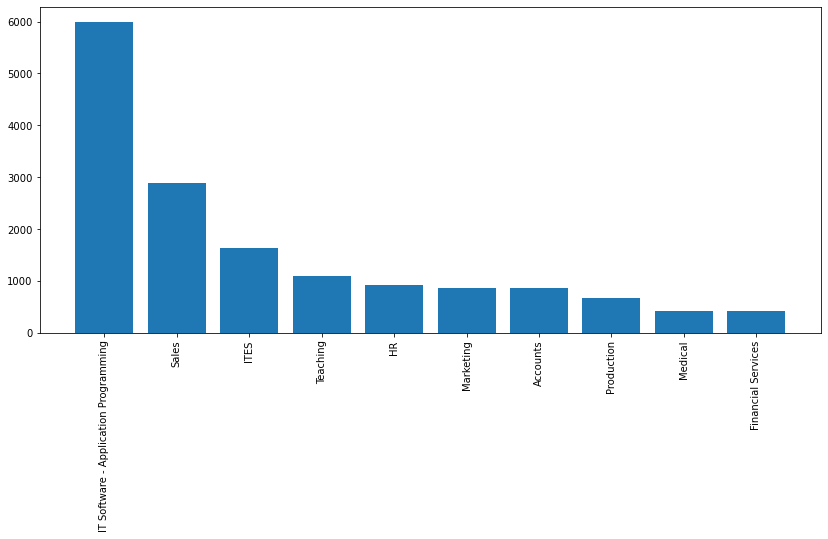

In [60]:
perform_analysis(data,'skills','Skills','count',1)

In [61]:
##IT Software - Application Programming is highly demanded skill

### joblocation analysis

        city  job count
0  Bangalore       5228
1     Mumbai       2887
2      Delhi       2741
3  Hyderabad       2182
4    Chennai       1204

 This is my pie chart 



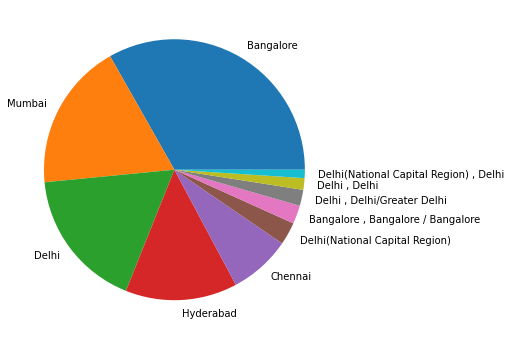

In [62]:
perform_analysis(data,'joblocation_address','city','job count',2)